<a href="https://colab.research.google.com/github/Chirag-Juneja/ML-Workbooks/blob/main/Deep%20Learning/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify images of clothing

## Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


## Data Preprocessing

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

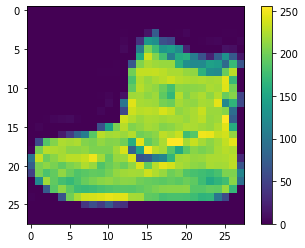

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

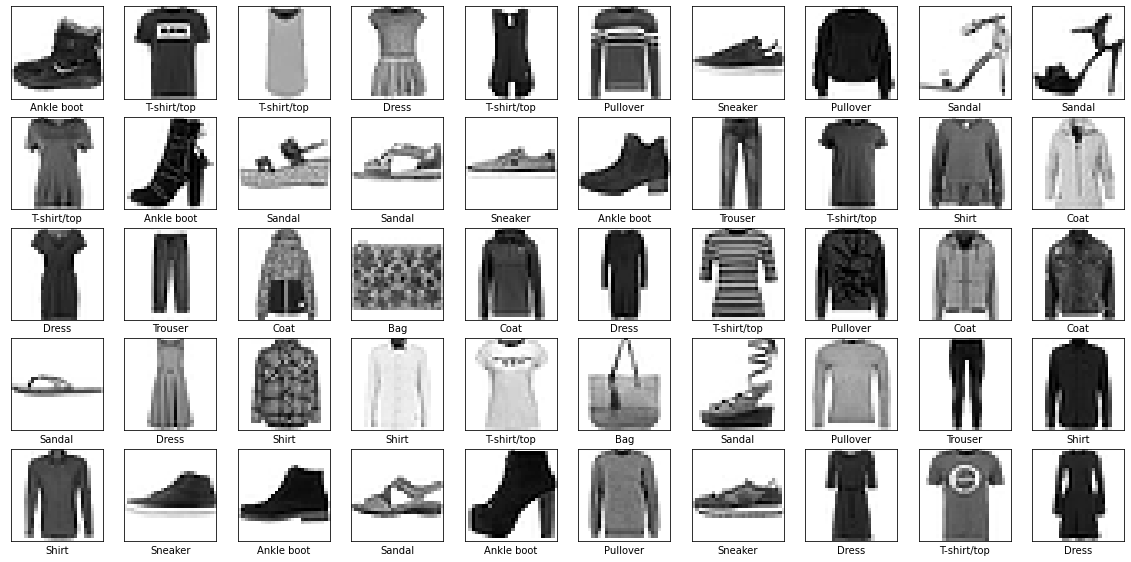

In [6]:
plt.figure(figsize=(20, 20))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Create ANN

In [7]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)
])

In [8]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

## Train the model

In [9]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5929 - accuracy: 0.7885
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3656 - accuracy: 0.8659
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3268 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3048 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2873 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2729 - accuracy: 0.8980
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2576 - accuracy: 0.9034
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2420 - accuracy: 0.9079
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2324 - accuracy: 0.9121
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.225

## Evaluate Accuracy

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:',test_acc)

313/313 - 0s - loss: 0.3565 - accuracy: 0.8800

Test accuracy: 0.8799999952316284


In [11]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [12]:
predictions = probability_model.predict(test_images)

## Verify Predictions

In [13]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100 * np.max(predictions_array),
        class_names[true_label]),
        color=color
        )
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

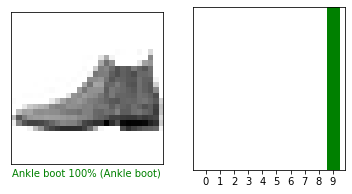

In [14]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

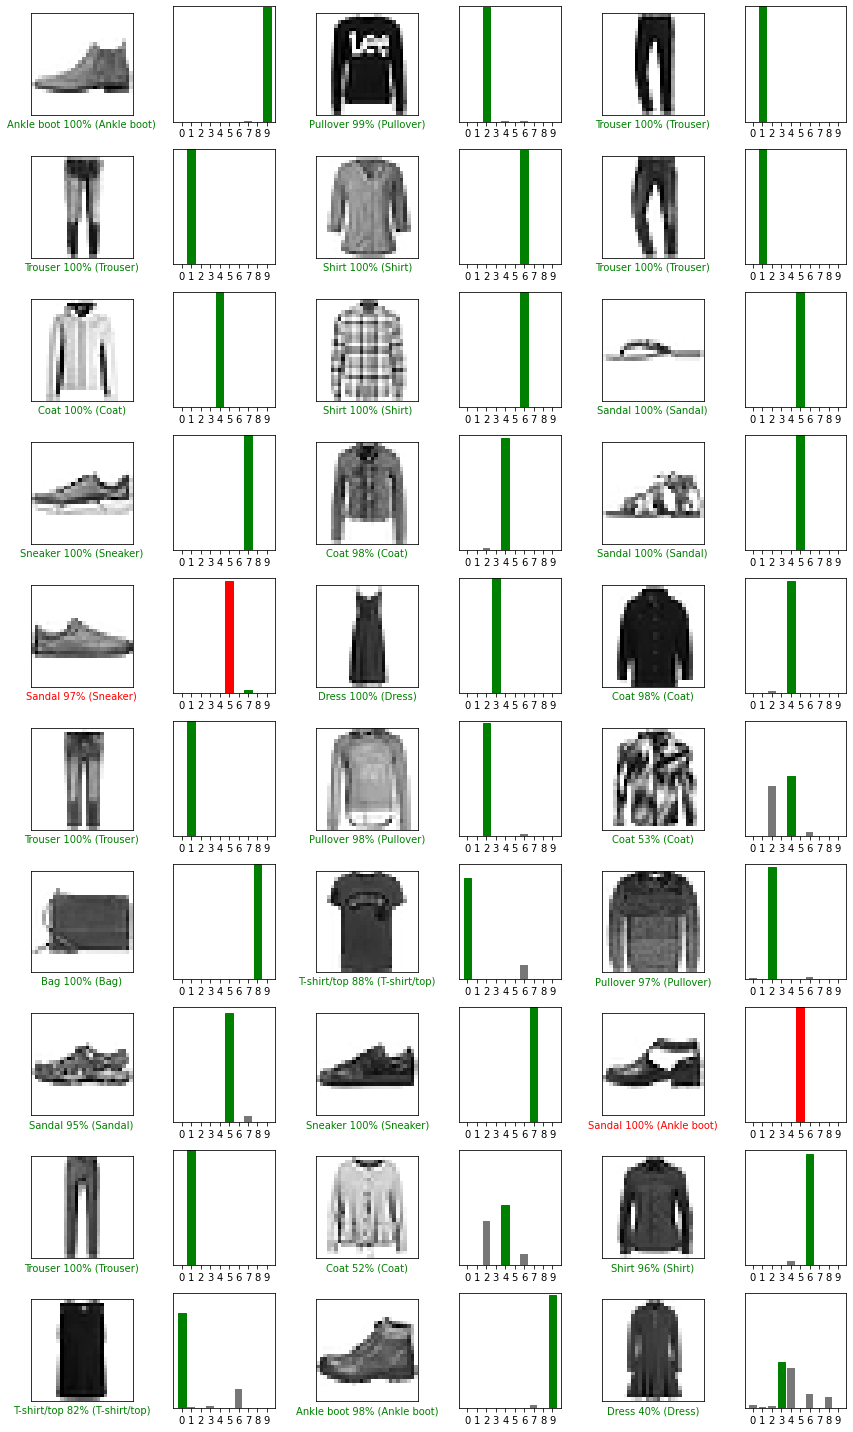

In [15]:
num_rows = 10
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i,predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()